1. Installing MNE and MNE_CONNECTIVITY

In [1]:
!pip install mne
!pip install mne_connectivity

2. Importing modules

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import mne_connectivity
import glob
import getpass
import importlib
import functions
import spectrogram_plotting_functions
importlib.reload(functions)
importlib.reload(spectrogram_plotting_functions)

<module 'spectrogram_plotting_functions' from 'c:\\Users\\Thomas\\Desktop\\cpl_analysis_naman\\spectrogram_plotting_functions.py'>

3. Generating synthetic data to test mne

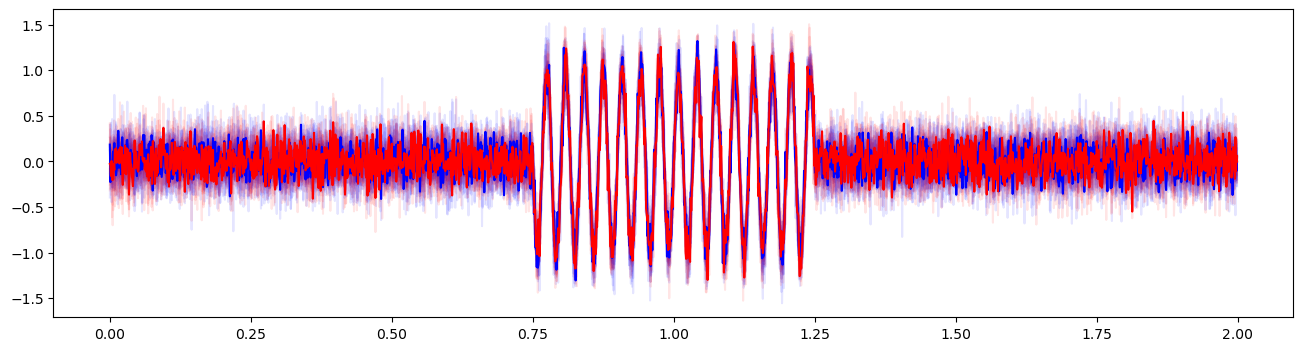

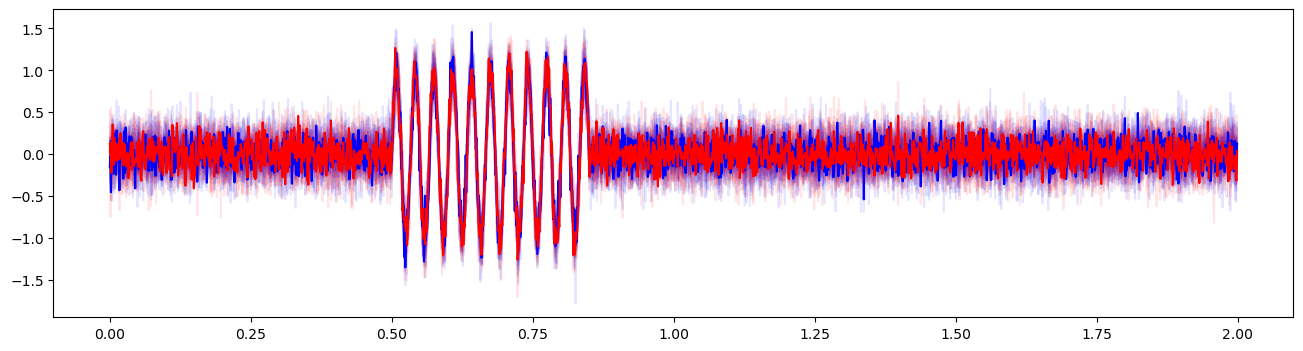

In [3]:
##Defining a function that takes the time, sampling frequency, and frequency of the oscillation and returns a epoch of generated LFP data

def generate_epoch(end_time, fs, osc_freq, osc_time_start, osc_time_end):

    times = np.arange(0, end_time, 1/fs)

    osc = np.sin(2 * np.pi * times[:] * osc_freq)[osc_time_start:osc_time_end]
    trials = 10
    epochs = np.empty((trials, 2, len(times)))
    plt.figure(figsize=(16,4))

    for trial in range(0, trials):
        lfp1 = np.random.normal(0, .2, size=times.shape)
        lfp2 = np.random.normal(0, .2, size=times.shape)
        lfp1[osc_time_start:osc_time_end] += osc
        lfp2[osc_time_start:osc_time_end] += osc
        epochs[trial, 0, :] = lfp1
        epochs[trial, 1, :] = lfp2
        plt.plot(times, lfp1, label='lfp1', color='blue', alpha=0.1)
        plt.plot(times, lfp2, label='lfp2', color='red', alpha=0.1)
    plt.plot(times, np.mean(epochs[0,:,:], axis=0), color='blue', label='lfp1')
    plt.plot(times, np.mean(epochs[1,:,:], axis=0), color='red',label='lfp2')
    return epochs, times

thirty_epoch, thirty_times=generate_epoch(2, 1000, 30, 750, 1250)
ten_epoch,ten_times=generate_epoch(2, 1000, 30, 500, 850)

3.2 Now we test the coherence function on the generated data

Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
[Connectivity computation done]


Text(0, 0.5, 'Frequency (Hz)')

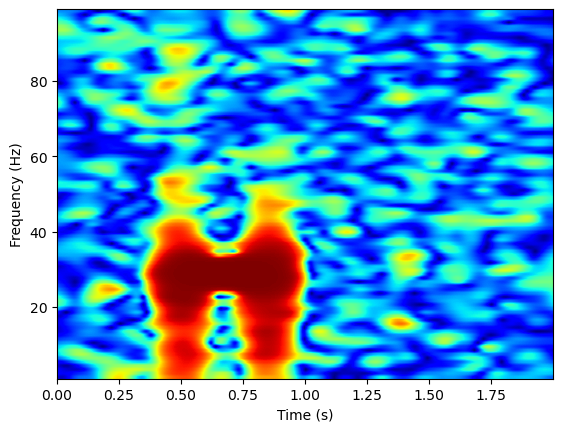

In [4]:
fs=1000
freqs = np.arange(1,100)
n_cycles = freqs/2
con = mne_connectivity.spectral_connectivity_epochs(ten_epoch, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))                                                   
coh = con.get_data()

plt.imshow(np.squeeze(coh), extent=[ten_times[0], ten_times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

3.3 Trying to take a average of the coherence to see how averaging works

Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morle

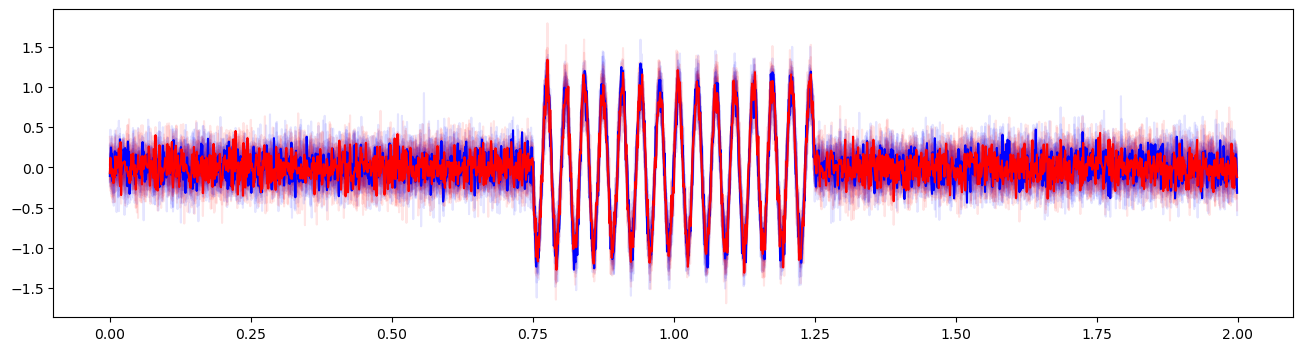

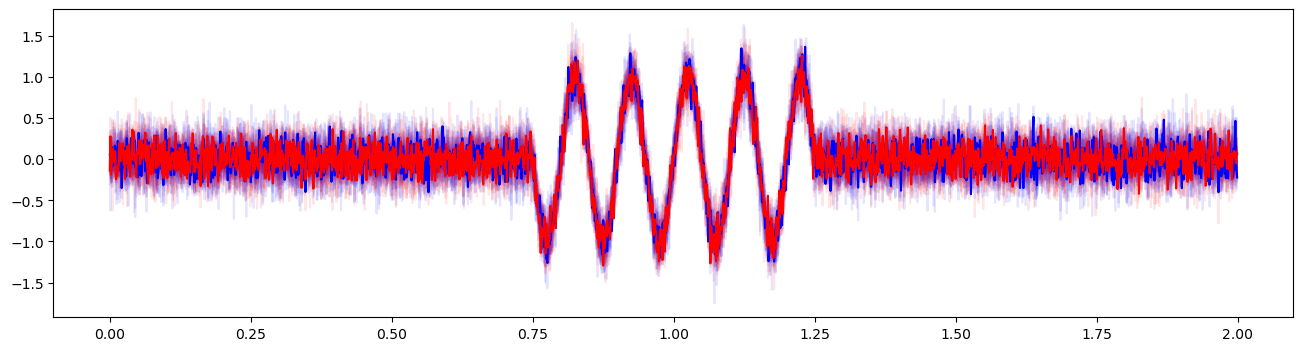

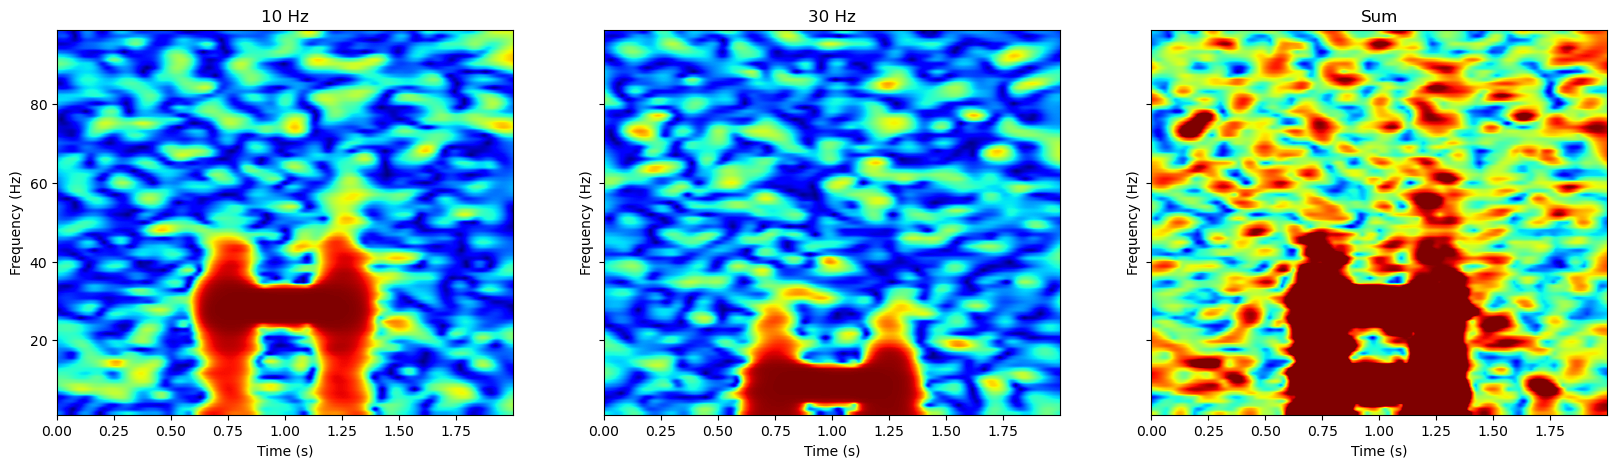

In [5]:
epoch_1, times_1 = generate_epoch(2, 1000, 30, 750, 1250)
epoch_2, times_2 = generate_epoch(2, 1000, 10, 750, 1250)

fs=1000
freqs = np.arange(1,100)
n_cycles = freqs/2
con_1 = mne_connectivity.spectral_connectivity_epochs(epoch_1, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))

con_2 = mne_connectivity.spectral_connectivity_epochs(epoch_2, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))

coh_1 = con_1.get_data()
coh_2 = con_2.get_data()

print(coh_1.shape)
print(coh_2.shape)

new_array= np.array([coh_1, coh_2])
print(new_array.shape)
new_array_mean = np.mean(new_array, axis=0)
new_array_sum = np.sum(new_array, axis=0)

# Compare the mean and sum arrays element-wise
if np.array_equal(new_array_mean, new_array_sum):
    print('The mean and sum are the same')
else:
    print('The mean and sum are different')

print(new_array_mean.shape)
print(new_array_sum.shape)

# Print some values for debugging
print("Mean array values:", new_array_mean)
print("Sum array values:", new_array_sum)
# Determine the common vmin and vmax for the colormap
vmin = min(np.min(coh_1), np.min(coh_2), np.min(new_array_mean))#, np.min(new_array_sum))
vmax = max(np.max(coh_1), np.max(coh_2), np.max(new_array_mean))#, np.max(new_array_sum))


fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
axs = axs.flatten()

im = axs[0].imshow(np.squeeze(coh_1), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[0].set_title('10 Hz')

axs[1].imshow(np.squeeze(coh_2), extent=[times_2[0], times_2[-1], freqs[0], freqs[-1]],
              aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[1].set_title('30 Hz')

# axs[2].imshow(np.squeeze(new_array_mean), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
#               aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
# axs[2].set_title('Mean')

axs[2].imshow(np.squeeze(new_array_sum), extent=[times_2[0], times_2[-1], freqs[0], freqs[-1]],
              aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[2].set_title('Sum')

# # Plot the difference between mean and sum
# difference = new_array_sum - new_array_mean
# axs[4].imshow(np.squeeze(difference), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
#               aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
# axs[4].set_title('Difference (Sum - Mean)')

for ax in axs:
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('Time (s)')

4. Loading up the real data

In [6]:

user= (getpass.getuser())
print("Hello", user)

base='C:\\Users\\{}\\Dropbox\\CPLab'.format(user)
files = glob.glob(base+'\\all_data_mat\\*.mat')
savepath = base+'\\results\\'
print(files)

Hello Thomas
['C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230529_dk1_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230529_dk3_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230529_dk5_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230529_dk6_nocontext.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230531_dk1_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230531_dk3_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230531_dk5_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230531_dk6_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230609_dk1_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230609_dk3_BW_nocontext_day1.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230610_dk1_BW_nocontext_day2.mat', 'C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat\\20230610_dk3_BW_noconte

In [7]:
keyboard_dict={'98':'b','119':'w','120':'nc','49':'1','48':'0'}

In [10]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
files=['C:\\Users\\Thomas\\Dropbox\\CPLab\\all_data_mat_filtered\\20230529_dk1_nocontext.mat']
event_data_df=[]
shuffled_event_data_df=[]
events_codes_all = {}
before_data_power_df=pd.DataFrame(columns=['rat_id','task','channel_id','before_data_power','before_data_spec'])
scrambled_baseline_power_df=pd.DataFrame(columns=['rat_id','task','channel_id','before_data_power','before_data_spec'])
averaged_data=pd.DataFrame(columns=['rat_id','task','channel_id','average_power_spectrum'])
averaged_data_welch=pd.DataFrame(columns=['rat_id','task','channel_id','average_power_spectrum'])
random_baseline_data=[]
for file in files:
    #if 'dk6' in file:
        
        print(file)
        base_name = os.path.basename(file)
        base_name, _ = os.path.splitext(base_name)

        date, rat_id, task = functions.exp_params(base_name)
        print(date, rat_id, task)
        if task == 'nocontextday2' or task == 'nocontextos2':
            task = 'nocontext'
        print(date, rat_id, task)

        f = h5py.File(file, 'r')
        channels = list(f.keys())
        print(channels)

        if 'Keyboard' in channels:
            events = f['Keyboard']
        elif 'keyboard' in channels:
            events = f['keyboard']
        elif 'memory' in channels:
            events = f['memory']
        elif 'Memory' in channels:
            events = f['Memory']

        events_codes = np.array(events['codes'][0])
        events_times = np.array(events['times'][0])
        events_codes_all[base_name] = events_codes
        epochs = functions.generate_epochs_with_first_event(events_codes, events_times)
        aon_lfp_channels=[x for x in channels if 'AON' in x ]
        vHp_lfp_channels=[x for x in channels if 'vHp' in x ]
        all_channels=np.concatenate((aon_lfp_channels,vHp_lfp_channels))
        print(all_channels)

        mne_epoch_door_before=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_door_after=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_dig_before=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_dig_after=np.zeros((len(epochs),len(all_channels),4000))
        first_event = events_times[0]
        for channel_num,channeli in enumerate(all_channels):
            #if "AON" in channeli or "vHp" in channeli:
                channel_id = channeli
                data_all = f[channeli]
                raw_data = np.array(data_all['values']).flatten()
                raw_time = np.array(data_all['times']).flatten()
                sampling_rate = int(1 / data_all['interval'][0][0])
                print(raw_data.shape, raw_time.shape, sampling_rate)
                notch_filtered_data = functions.iir_notch(raw_data, sampling_rate, 60)

                normalized_data, time, data_before = functions.data_normalization(notch_filtered_data, raw_time, first_event, sampling_rate)

                total = normalized_data

                
                for i, epochi in enumerate(epochs):
                    door_timestamp = epochi[0][0]
                    trial_type = epochi[0][1]
                    dig_type = epochi[1, 1]
                    print(dig_type)
                    dig_timestamp = epochi[1, 0]
                    print(door_timestamp, trial_type, dig_timestamp, dig_type)
                    data_complete_trial = functions.extract_complete_trial_data(total, time, door_timestamp, dig_timestamp, sampling_rate)
                    #Here we will extract and store the events data
                    data_door_before,data_door_after=functions.extract_door_data(total, time, door_timestamp, sampling_rate)    
                    data_dig_before, data_dig_after=functions.extract_dig_data(total,time, dig_timestamp, sampling_rate)
                    mne_epoch_door_before[i,channel_num,:]=list(data_door_before)
                    mne_epoch_door_after[i,channel_num,:]=list(data_door_after)
                    mne_epoch_dig_before[i,channel_num,:]=list(data_dig_before)
                    mne_epoch_dig_after[i,channel_num,:]=list(data_dig_after)

        fs=2000
        freqs = np.arange(1,100)
        n_cycles = freqs/2
        info = mne.create_info(ch_names=list(all_channels), sfreq=fs, ch_types='eeg')
        mne_epoch_door_before = mne.EpochsArray(mne_epoch_door_before, info)
        mne_epoch_door_after= mne.EpochsArray(mne_epoch_door_after, info)
        mne_epoch_dig_before = mne.EpochsArray(mne_epoch_dig_before, info)
        mne_epoch_dig_after = mne.EpochsArray(mne_epoch_dig_after, info)

        

C:\Users\Thomas\Dropbox\CPLab\all_data_mat_filtered\20230529_dk1_nocontext.mat
20230529 dk1 nocontext
20230529 dk1 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
['LFP1_AON' 'LFP2_AON' 'LFP3_AON' 'LFP4_AON' 'LFP1_vHp' 'LFP2_vHp']
(1516022,) (1516022,) 2000
notch filter applied
normalizing data
49.0
181.20385499999998 120.0 182.713855 49.0
4000 4000
4000 4000
48.0
237.771855 120.0 239.46185499999999 48.0
4000 4000
4000 4000
49.0
279.551855 120.0 280.29184999999995 49.0
4000 4000
4000 4000
48.0
348.953855 120.0 349.84385 48.0
4000 4000
4000 4000
49.0
466.78984999999994 120.0 468.25985499999996 49.0
4000 4000
4000 4000
49.0
526.9038549999999 120.0 528.223855 49.0
4000 4000
4000 4000
49.0
570.771855 120.0 571.4418549999999 49.0
4000 4000
4000 4000
48.0
617.237855 120.0 618.4178549999999 48.0
4000 4000
4000 4000
49.0
669.49786 120.0 670.737855 49.0
4000 4000
4000 4000
49.0
705.3358549999999 120.0 706.5758549999999 49

5. Calculating Spectral connectivity and plotting it. Also plots the average of spectral connectivity in a separate plot

C:\Users\Thomas\AppData\Local\Temp\ipykernel_18216\427092421.py:2: RuntimeWarning: There were no Annotations stored in <EpochsArray | 10 events (all good), 0 – 2 s (baseline off), ~1.8 MB, data loaded,
 '1': 10>, so metadata was not modified.
  con = mne_connectivity.spectral_connectivity_epochs(epoch_data, method='coh', sfreq=int(fs),


(6, 6, 97, 4000)
Connection indices: ['LFP1_AON', 'LFP2_AON', 'LFP3_AON', 'LFP4_AON', 'LFP1_vHp', 'LFP2_vHp']
 number of connections before filtering 16
number of connections after filtering 6
 number of connections before filtering 8
number of connections after filtering 8
 number of connections before filtering 4
number of connections after filtering 1


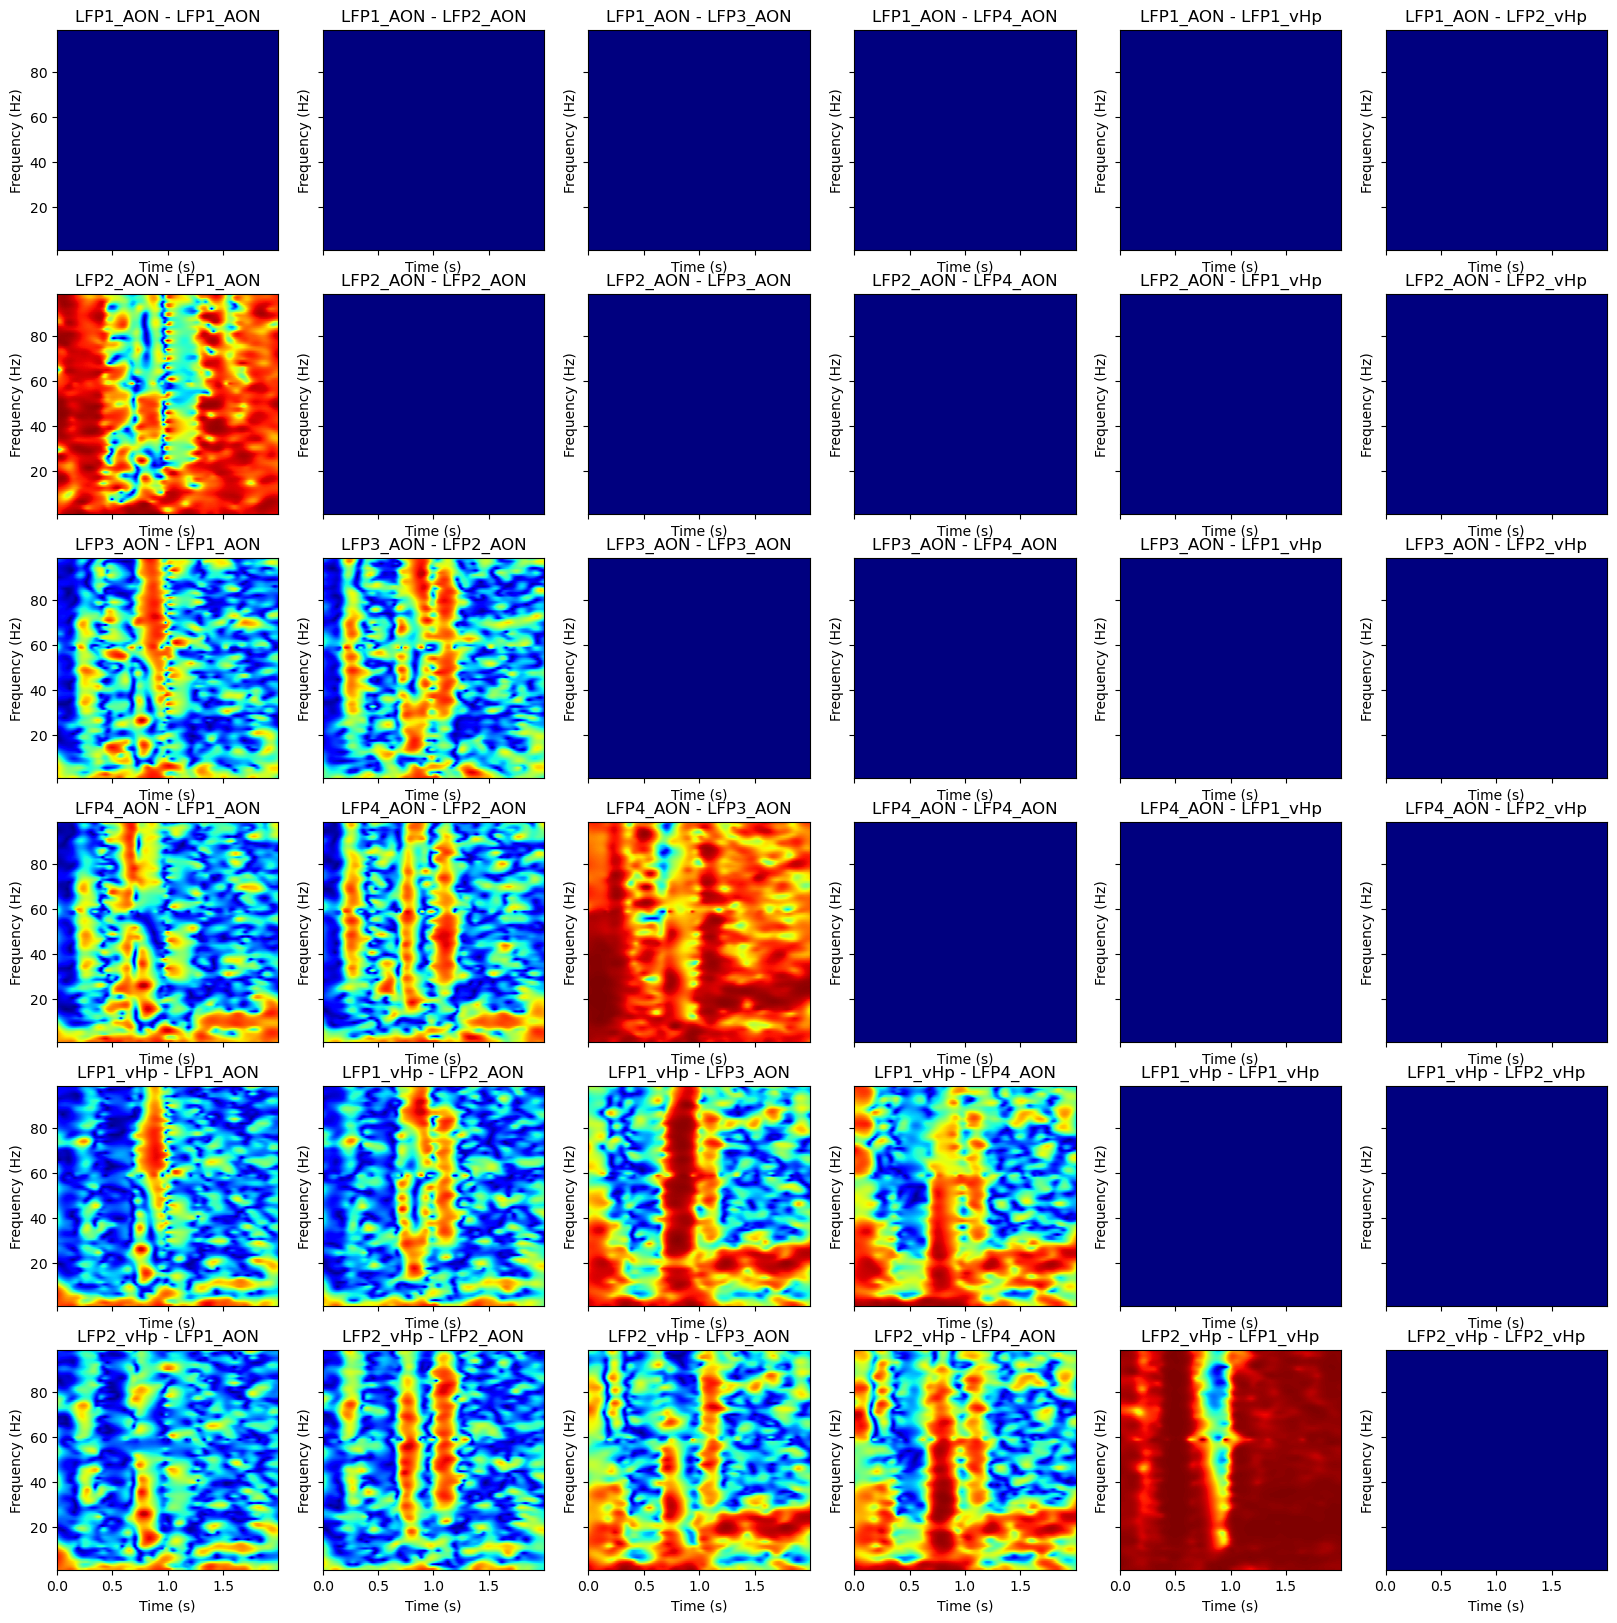

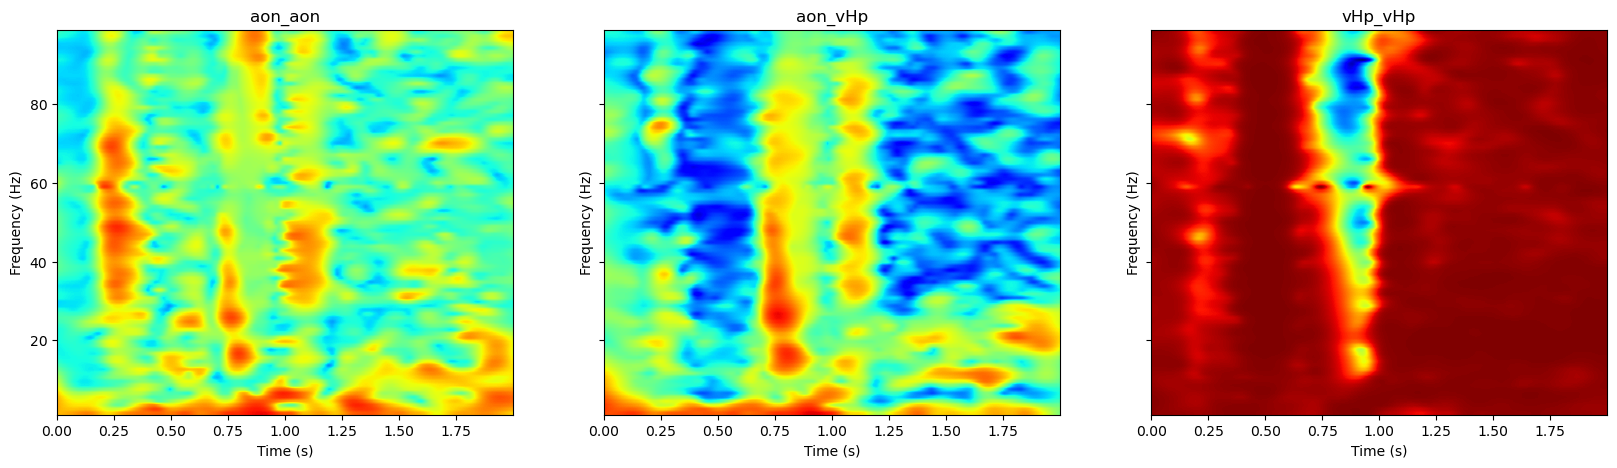

In [51]:
epoch_data=mne_epoch_dig_before
con = mne_connectivity.spectral_connectivity_epochs(epoch_data, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=False)

coh = con.get_data(output='dense')
print(coh.shape)
indices = con.names
print("Connection indices:", indices)
fig, axs = plt.subplots(coh.shape[0],coh.shape[1] , figsize=(20, 20), sharex=True, sharey=True)
times = np.arange(0, 2, 1/fs)
aon_aon_con=[]
aon_vHp_con=[]
vHp_vHp_con=[]
for i in range(coh.shape[0]):
    for j in range(coh.shape[1]):
        axs[i,j].imshow(np.squeeze(coh[i,j,:,:]), extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
        axs[i,j].set_xlabel('Time (s)')
        axs[i,j].set_ylabel('Frequency (Hz)')
        axs[i,j].set_title('{} - {}'.format(indices[i], indices[j]))
        if 'AON' in indices[i] and 'AON' in indices[j]:
            aon_aon_con.append(coh[i,j,:,:])
        elif 'AON' in indices[j] and 'vHp' in indices[i]:
            aon_vHp_con.append(coh[i,j,:,:])
        elif 'vHp' in indices[i] and 'vHp' in indices[j]:
            vHp_vHp_con.append(coh[i,j,:,:])

#### Average the connections and plot them

def filtered_and_mean_con(con):
    print(' number of connections before filtering',len(con))
    filter_con=[x for x in con if x.any()>0]
    print('number of connections after filtering',len(filter_con))
    filter_con=np.array(filter_con)

    filter_con_mean=np.mean(filter_con, axis=0)
    return filter_con_mean
con_dict={'aon_aon':aon_aon_con,'aon_vHp':aon_vHp_con,'vHp_vHp':vHp_vHp_con}
fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
axs=axs.flatten()
for i, key in enumerate(con_dict):
    con=con_dict[key]
    con_mean=filtered_and_mean_con(con)
    axs[i].imshow(con_mean, extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(key)
plt.show()


5. Now I will average Aon-aon, vhp-vhp and aon-vhp connections

 number of connections before filtering 16
number of connections after filtering 6
 number of connections before filtering 8
number of connections after filtering 8
 number of connections before filtering 4
number of connections after filtering 1


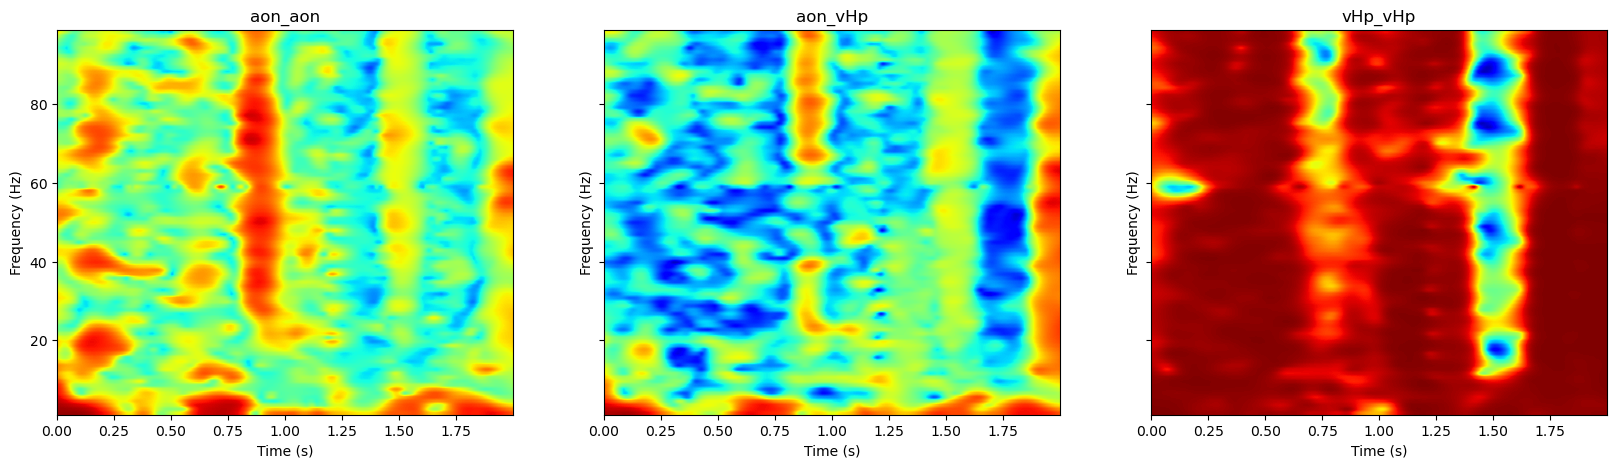

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_reshaped = mne_epoch_door_before.reshape(-1, 4000)  # Reshape to (n_epochs * n_channels, n_times)
data_normalized = scaler.fit_transform(data_reshaped)
data_normalized = data_normalized.reshape(len(epochs), len(lfp_channels), 4000)  # Reshape back to (n_epochs, n_channels, n_times)

info = mne.create_info(ch_names=channels, sfreq=2000.0, ch_types='misc')



In [27]:
# Create MNE EpochsArray
mne_epoch_door_before = mne.EpochsArray(data_normalized, info)

# Plot the data
fig = mne_epoch_door_before.plot(picks=np.arange(1, 8), n_epochs=10)


fig.show()

# info=mne.create_info(ch_names=channels,sfreq=2000.0,ch_types='misc')
# mne_epoch_door_before=mne.EpochsArray(mne_epoch_door_before,info)
# #fig,axs=plt.subplots(1,1,figsize=(30,10))
# fig=mne_epoch_door_before.plot(picks=np.arange(1,8),n_epochs=10)
# fig.show()

ValueError: Info and data must have same number of channels.

In [21]:
!pip install mne_connectivity

In [ ]:
import mne
import mne_connectivity


Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 6 connections
    using t=0.000s..2.000s for estimation (4000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
    assembling connectivity matrix
[Connectivity computation done]


In [ ]:
%matplotlib inline
print(coh.shape)
plt.imshow(np.squeeze(coh[,:,:]), extent=[0, 2, freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

SyntaxError: invalid syntax (1579395256.py, line 4)

In [37]:
print(coh)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

C:\Users\Thomas\AppData\Local\Temp\ipykernel_67096\1184834707.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


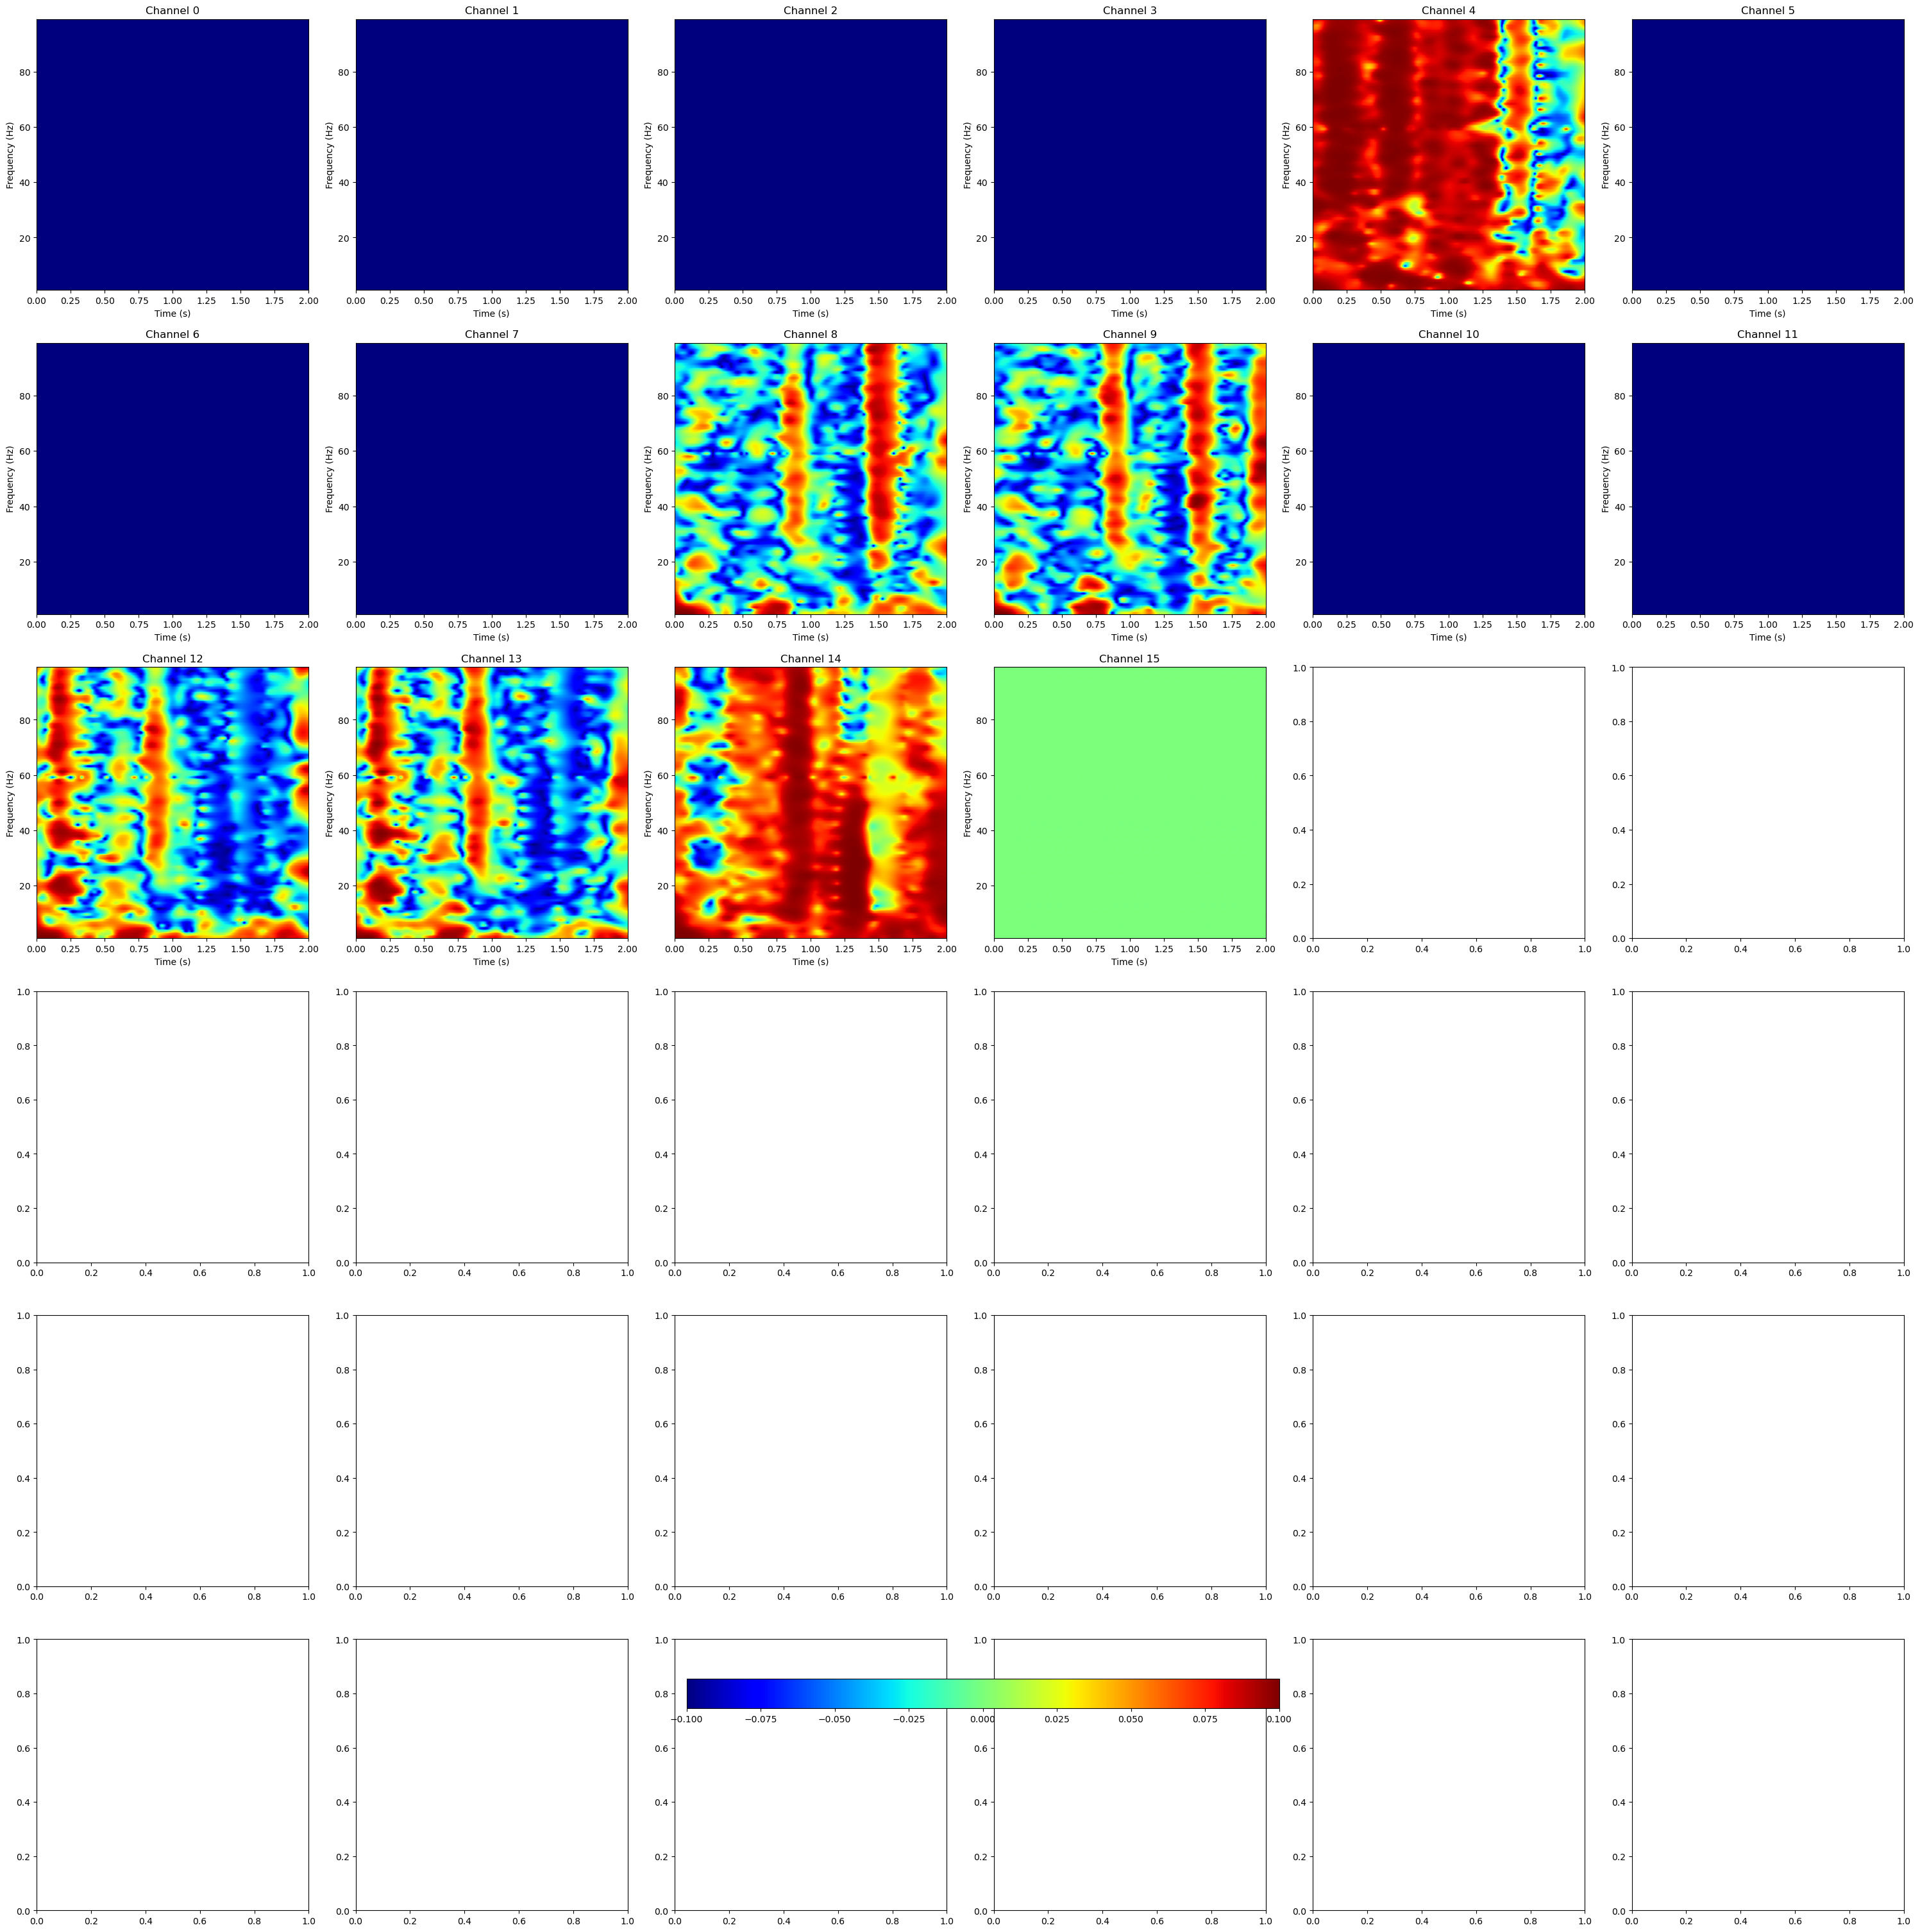

In [40]:
coh = con.get_data()

fig, axs = plt.subplots(6, 6, figsize=(30, 30))
axs = axs.flatten()

for i in range(coh.shape[0]):
    im = axs[i].imshow(np.squeeze(coh[i, :, :]), extent=[0, 2, freqs[0], freqs[-1]],
                       aspect='auto', origin='lower', cmap='jet')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title('Channel {}'.format(i))

# Add a colorbar
fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()